# Data-Driven Insights on Health and Lifestyle: Analyzing Correlations and Testing Hypotheses

## I. Exploratory Data Analysis (EDA)

In [536]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [537]:
file_path = './synthetic_health_data.csv'
data = pd.read_csv(file_path)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1000 non-null   float64
 1   BMI                  1000 non-null   float64
 2   Exercise_Frequency   1000 non-null   int64  
 3   Diet_Quality         1000 non-null   float64
 4   Sleep_Hours          1000 non-null   float64
 5   Smoking_Status       1000 non-null   int64  
 6   Alcohol_Consumption  1000 non-null   float64
 7   Health_Score         1000 non-null   float64
dtypes: float64(6), int64(2)
memory usage: 62.6 KB
None


In [538]:
print(data.head())

         Age        BMI  Exercise_Frequency  Diet_Quality  Sleep_Hours  \
0  45.960570  31.996777                   5     55.403270     7.300359   
1  38.340828  29.623168                   6     41.838357     7.012419   
2  47.772262  25.298152                   5     76.904948     6.028641   
3  58.276358  21.765316                   2     49.756767     5.802714   
4  37.190160  28.491117                   2     44.218737     7.912548   

   Smoking_Status  Alcohol_Consumption  Health_Score  
0               0             2.834707     70.542122  
1               1             7.199517     57.244637  
2               1             4.097944     96.333722  
3               1             3.649377     61.321783  
4               0             2.839795     67.175894  


In [539]:
print(data.isnull().sum())

Age                    0
BMI                    0
Exercise_Frequency     0
Diet_Quality           0
Sleep_Hours            0
Smoking_Status         0
Alcohol_Consumption    0
Health_Score           0
dtype: int64


In [540]:
print(data.describe())

               Age          BMI  Exercise_Frequency  Diet_Quality  \
count  1000.000000  1000.000000         1000.000000   1000.000000   
mean     40.231985    25.354181            2.888000     69.952977   
std      11.750591     4.987272            1.995354     14.972061   
min       1.104792    10.298057            0.000000     19.907497   
25%      32.228916    21.968792            1.000000     59.945481   
50%      40.303607    25.315386            3.000000     69.975151   
75%      47.775327    28.644411            5.000000     80.527839   
max      86.232778    40.965538            6.000000    110.265186   

       Sleep_Hours  Smoking_Status  Alcohol_Consumption  Health_Score  
count  1000.000000     1000.000000          1000.000000   1000.000000  
mean      6.973135        0.499000             3.079377     85.479947  
std       1.517218        0.500249             2.084564     13.633845  
min       2.431107        0.000000            -3.592506     29.106017  
25%       5.903351

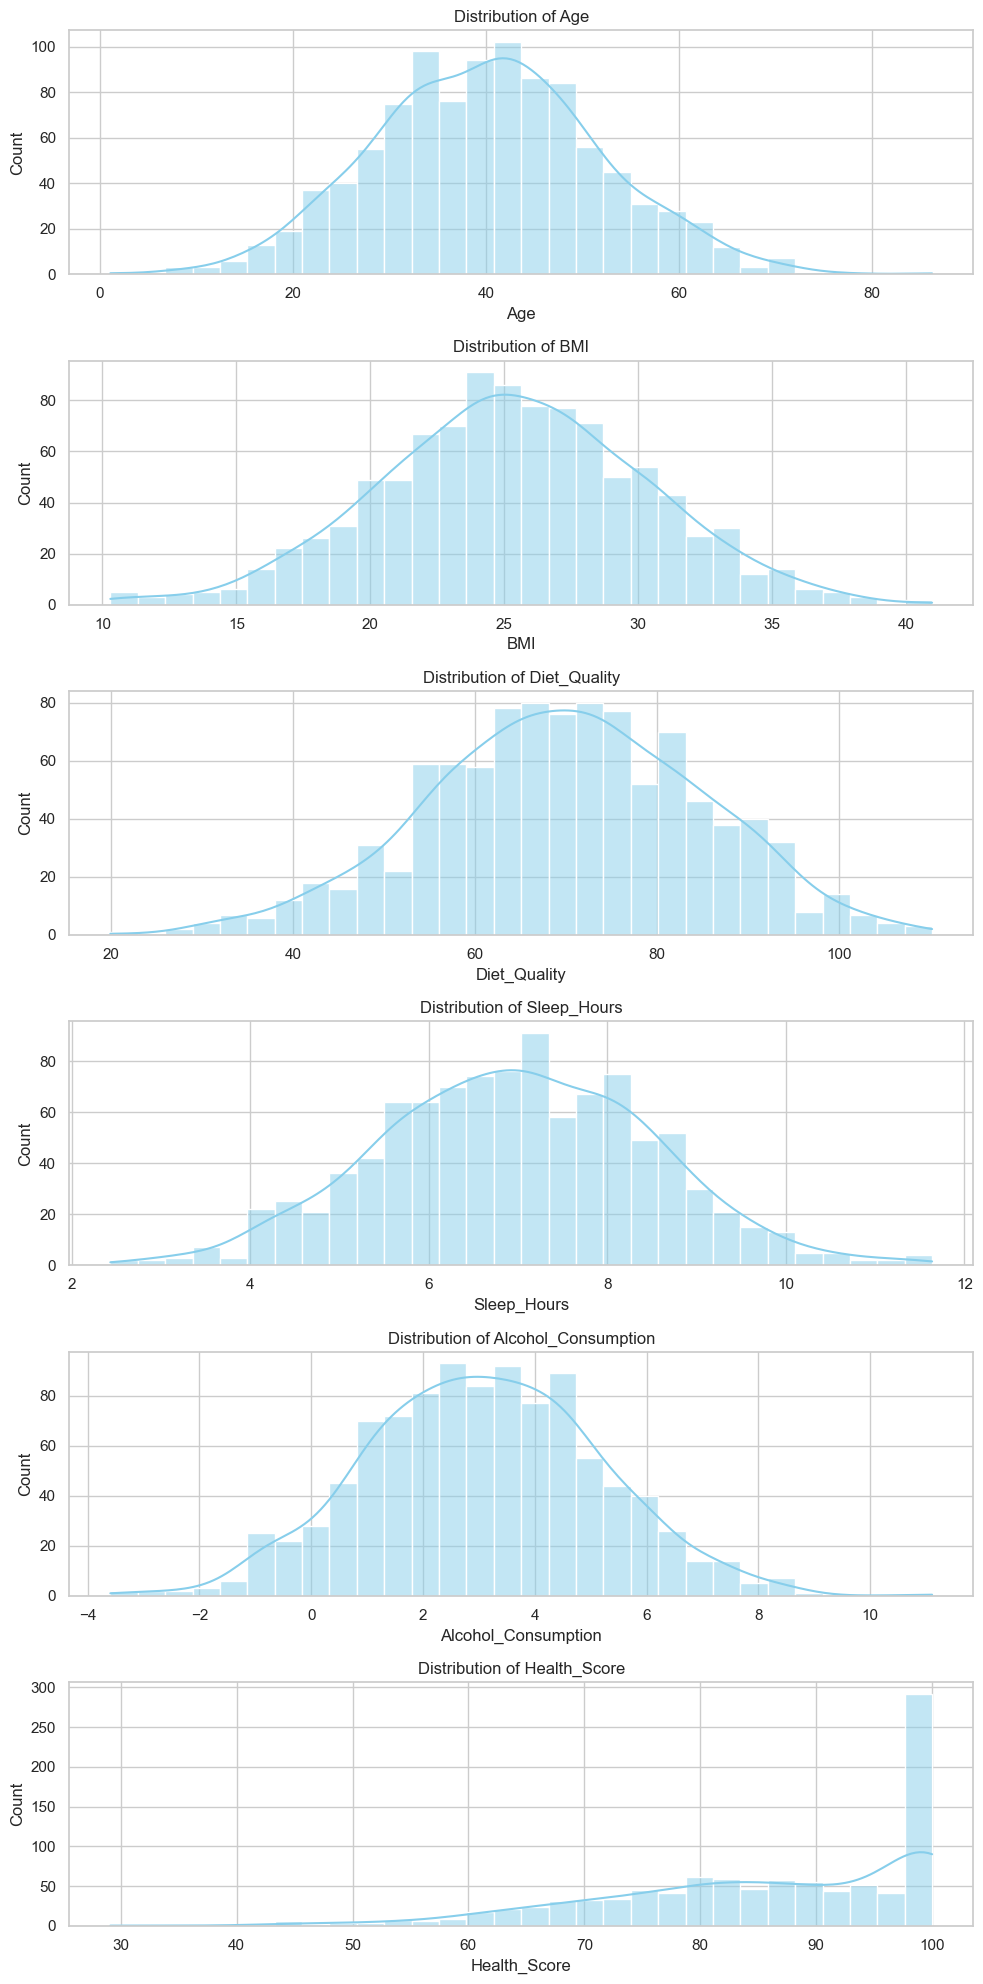

In [541]:
numeric_columns = ['Age', 'BMI', 'Diet_Quality', 'Sleep_Hours', 'Alcohol_Consumption', 'Health_Score']

# distributions
fig, axes = plt.subplots(len(numeric_columns), 1, figsize=(10, 20))
for i, col in enumerate(numeric_columns):
    sns.histplot(data[col], kde=True, ax=axes[i], bins=30, color="skyblue")
    axes[i].set_title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

/var/folders/m7/2d5d832j3j300wwm7q5ptzdh0000gn/T/ipykernel_74619/564588546.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Exercise_Frequency", data=data, palette="viridis", ax=ax[0])
/var/folders/m7/2d5d832j3j300wwm7q5ptzdh0000gn/T/ipykernel_74619/564588546.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Smoking_Status", data=data, palette="muted", ax=ax[1])


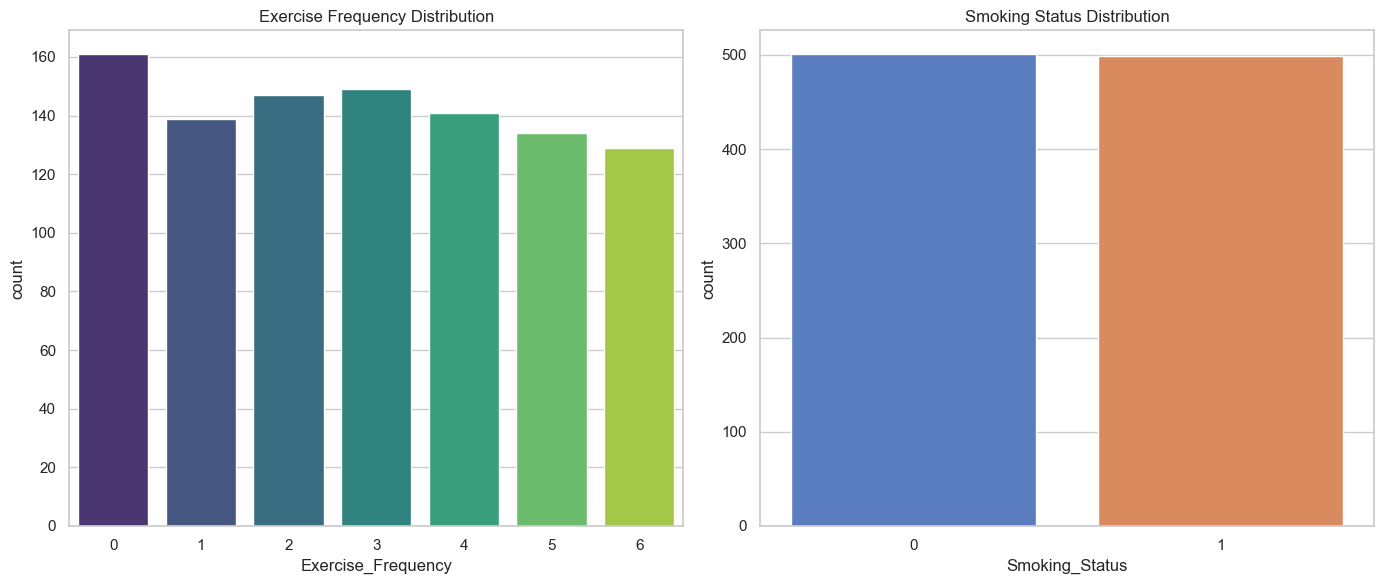

In [542]:
# category variables
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
sns.countplot(x="Exercise_Frequency", data=data, palette="viridis", ax=ax[0])
ax[0].set_title("Exercise Frequency Distribution")
sns.countplot(x="Smoking_Status", data=data, palette="muted", ax=ax[1])
ax[1].set_title("Smoking Status Distribution")
plt.tight_layout()
plt.show()

- Age: Age is distributed over a wide range, but tends to be around 40 years old.
- BMI: Nearly normally distributed.
- Diet_Quality: Diet quality is generally distributed with little bias.
- Sleep_Hours: Sleep hours are concentrated between 5 and 8 hours.
- Alcohol_Consumption: The distribution of alcohol consumption has a slightly longer tail to the right.
- Health_Score: Health scores are concentrated in the high range.


- Exercise_Frequency: Exercise frequency is skewed, with some categories being more prevalent than others.
- Smoking_Status: There is a clear split between smokers and nonsmokers.

## II. Hypothesis Testing:

In [543]:
def isNullHypothesisRejected(p_value):
    return True if p_value < 0.05 else False


def printConclusion(isNullHypothesisRejected):
    if isNullHypothesisRejected:
        print("Reject the null hypothesis.")
    else:
        print("Fail to reject the null hypothesis.")

### Hypothesis1: Smokers tends to have lower Health Score than non-smokers.
- Null Hypothesis (H₀): There is no significant difference in health scores between smokers and nonsmokers.
- Alternative Hypothesis (H₁): Smokers tends to have lower Health Score than non-smokers.

In [544]:
smorkers = data[data["Smoking_Status"] == 1]["Health_Score"]
non_smorkers = data[data["Smoking_Status"] == 0]["Health_Score"]

# Perform t-test
t_stat, p_value = stats.ttest_ind(smorkers, non_smorkers, alternative="less")

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpret the results
isRejected = isNullHypothesisRejected(p_value)
printConclusion(isRejected)

T-statistic: -3.4680210556941535
P-value: 0.00027334051907737067
Reject the null hypothesis.


Here's the interpretation
- **T-statistic**: -3.47 (negative value, suggesting a difference in the health scores of smokers and nonsmokers in the opposite direction).  
- **P-value**: 0.0002 (so small that the null hypothesis is rejected) which means that there is a significant difference in health scores between smokers and nonsmokers.

### Hypothesis2: The higher the frequency of exercise people have, the lower BMI they have.
- Null Hypothesis (H₀): There is no significant difference in BMI between groups with different exercise frequency.
- Alternative Hypothesis (H₁): There is a significant difference in BMI between groups with different exercise frequency.

In [545]:
bmi_no_exercise = data[data["Exercise_Frequency"] == 0]["BMI"]
bmi_1_2_times = data[(data["Exercise_Frequency"] >= 1) & (data["Exercise_Frequency"] <= 2)]["BMI"]
bmi_3_times = data[data["Exercise_Frequency"] >= 3]["BMI"]

# ANOVA
f_stat, p_value = stats.f_oneway(bmi_no_exercise, bmi_1_2_times, bmi_3_times)

print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

# Interpret the results
isRejected = isNullHypothesisRejected(p_value)
printConclusion(isRejected)

F-statistic: 0.4632299041064823
P-value: 0.6293833114484588
Fail to reject the null hypothesis.


Here's the interpretation
- **F-statistic**: A low F-statistic means that differences between groups are small compared to within-group variation.
- **P-value**: 0.6294 is greater than 0.05, meaning that there is no statistically significant difference in BMI between groups with different exercise frequencies (no exercise, 1-2 times per week, 3 or more times per week).

# III. Correlation Testing:

### Is there a Pearson correlation between age and BMI?

In [546]:
# Pearson
corr, p_value = stats.pearsonr(data['Age'], data['BMI'])

print(f"Pearson correlation: {corr}")
print(f"P-value: {p_value}")

Pearson correlation: -0.04039987129344417
P-value: 0.2017861101864367


Here's the interpretation
- **Pearson correlation**: -0.0404 is nearly zero, meaning there is little correlation between age and BMI.
- **P-value**: The result indicates the statistical conclusion that there is no significant correlation between age and BMI.

#### Visualization

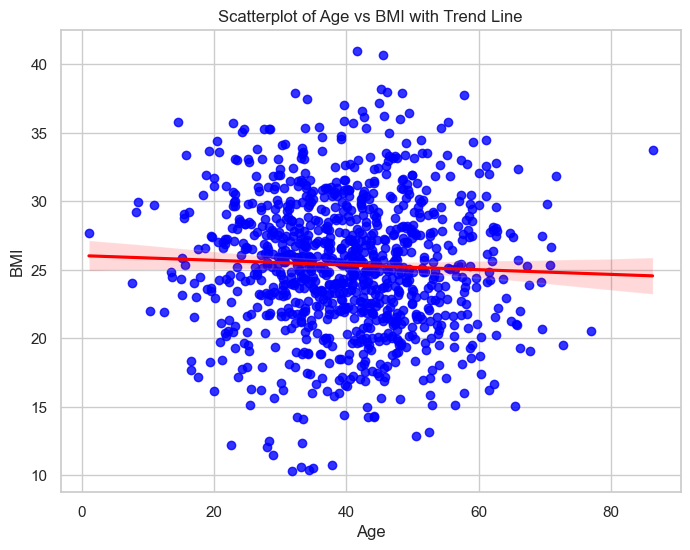

In [547]:
plt.figure(figsize=(8, 6))
sns.regplot(x='Age', y='BMI', data=data, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.xlabel('Age')
plt.ylabel('BMI')
plt.title('Scatterplot of Age vs BMI with Trend Line')
plt.show()

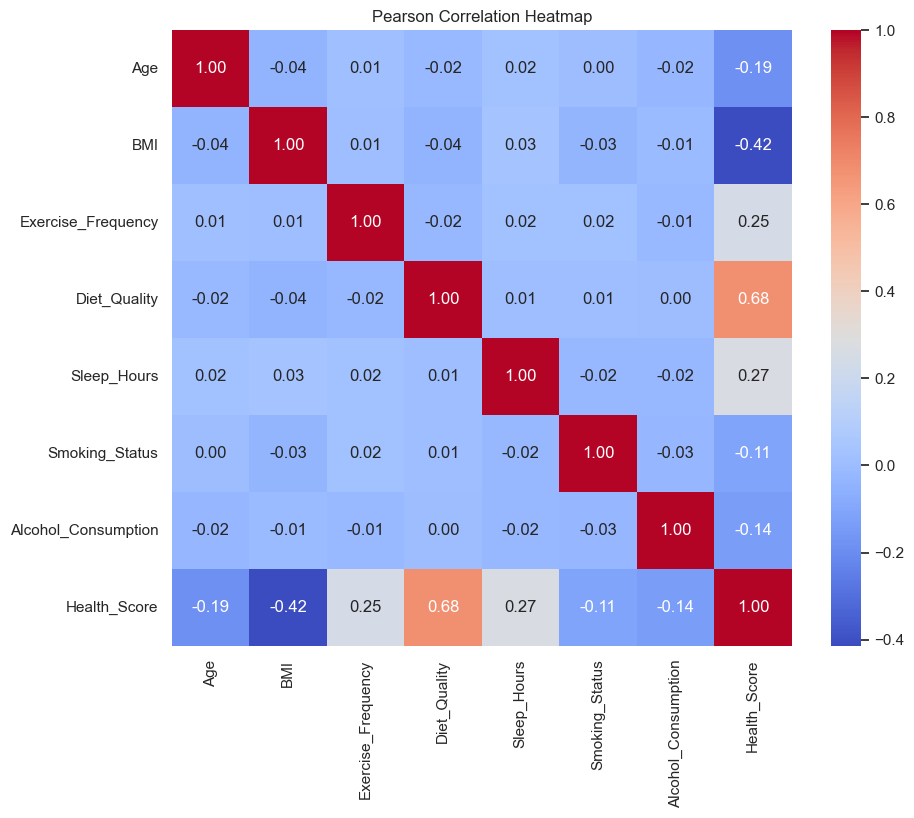

In [548]:
# Compute the Pearson correlation matrix
pearson_corr = data.corr(method='pearson')

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Pearson Correlation Heatmap")
plt.show()

### Is there a Spearman correlation between sleep hours and health score?

In [549]:
# Spearman
corr, p_value = stats.spearmanr(data['Sleep_Hours'], data['Health_Score'])

print(f"Spearman correlation: {corr}")
print(f"P-value: {p_value}")

Spearman correlation: 0.24185977163950992
P-value: 8.896131485042629e-15


Here's the interpretation
- **Spearman correlation**: 0.2418 indicates little correlation (weak positive correlation) between sleep hours and health score.
- **P-value**: Rejected the null hypothesis(no correlation) , meaning that there is a statistically significant correlation.

#### Visualization

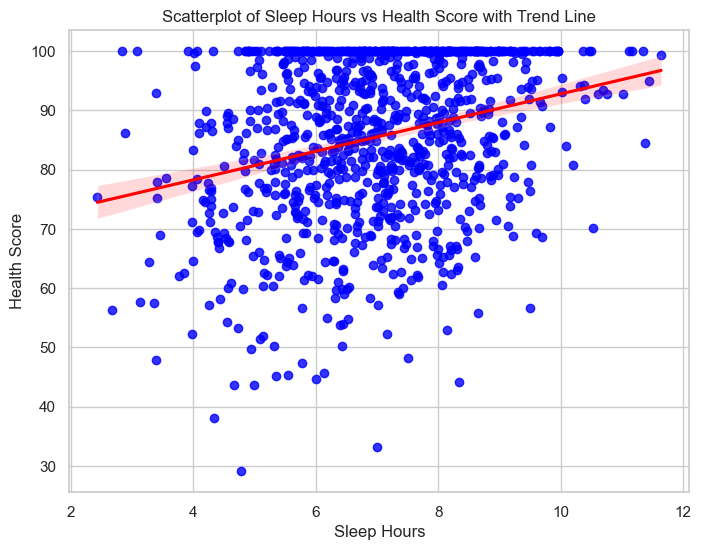

In [550]:
plt.figure(figsize=(8, 6))
sns.regplot(x='Sleep_Hours', y='Health_Score', data=data, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.xlabel('Sleep Hours')
plt.ylabel('Health Score')
plt.title('Scatterplot of Sleep Hours vs Health Score with Trend Line')
plt.show()

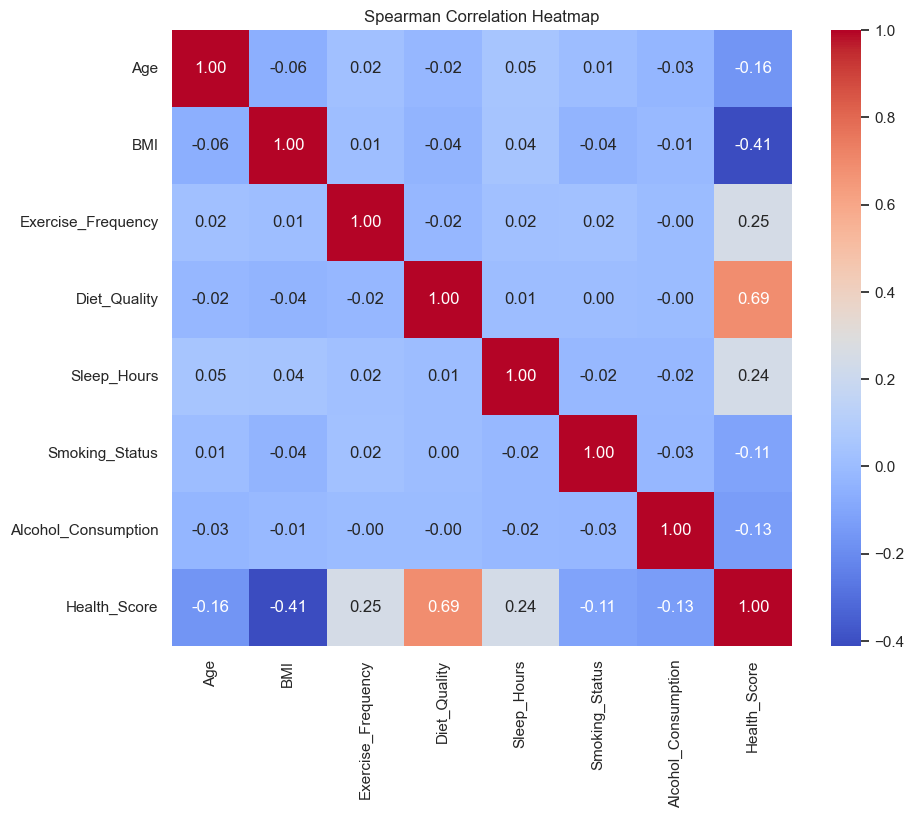

In [551]:
# Compute the Spearman correlation matrix
spearman_corr = data.corr(method='spearman')

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Spearman Correlation Heatmap")
plt.show()

## IV. Interpretation & Real-World Application:

### Insights into the Data

#### Hypothesis Testing

##### Hypothesis1: Smokers tends to have lower Health Score than non-smokers:
- **Result**: There is a significant difference in health scores between smokers and nonsmokers.
- **Insight**: The data supports the notion that smoking has a measurable negative impact on health, as smokers tend to have lower health scores compared to non-smokers. This could suggest that smoking is associated with poorer health outcomes, which is consistent with public health knowledge. This finding can inform health policies by reinforcing the importance of smoking cessation programs and promoting healthier lifestyle choices.


##### Hypothesis2: The higher the frequency of exercise people have, the lower BMI they have: 
- **Result**: There is no statistically significant difference in BMI between groups with different exercise frequencies.
- **Insight**: The analysis does not find strong evidence that exercise frequency directly impacts BMI in this dataset. For individuals looking to manage their BMI, this finding suggests that a comprehensive approach, including not only exercise but also a balanced diet and other lifestyle changes, may be more effective than relying on exercise alone. 

#### Correlation Testing**
##### Is there a Pearson correlation between age and BMI?:
- **Result**: There is no significant correlation between age and BMI.
- **Insight**: The data shows no clear relationship between age and BMI. This finding suggests that BMI management should not be based solely on age. Interventions focusing on maintaining a healthy weight should consider individual factors such as lifestyle and health habits rather than assuming age is a significant predictor of BMI. 

##### Is there a Spearman correlation between sleep hours and health score?:
- **Result**: There is a little correlation (weak positive correlation) between sleep hours and health score.
- **Insight**: The positive correlation, though weak, suggests that individuals who get more sleep may have slightly higher health scores. While the relationship is not strong, this finding is consistent with existing research indicating that adequate sleep can have a positive effect on health. However, given the weak correlation, it would be important to focus on sleep as just one factor in a broader set of health behaviors.

## Conclusion

- Smokers have lower health scores: Smoking negatively impacts health, highlighting the need for smoking cessation programs.

- Exercise frequency and BMI: No significant link between exercise frequency and BMI, suggesting a holistic approach to BMI management, including diet and lifestyle.

- Age and BMI: Age is not a significant factor in BMI, emphasizing the importance of focusing on individual health habits.

- Sleep hours and health score: A weak positive correlation indicates that more sleep may slightly improve health, but other factors should also be considered.